### Pre processing data Before Select Features


In [217]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


In [218]:
#reading data frame 
df = pd.read_csv("is_Appnea_Features_Selection.csv")


In [219]:
df.shape

(17045, 21)

In [220]:
df.head()

,Unnamed: 0,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,P2P,...,SKEW,KURTOSIS,MAX_f,SUM_f,MEAN_f,VAR_f,PEAK_f,SKEW_f,KURTOSIS_f,Appnea
0,0,-0.885,1.750,-0.000796,0.254363,0.064700,0.254362,0.064701,1.750,2.635,...,2.827631,16.328233,2.033477,391.244275,0.064701,0.019939,2.033477,2.827631,16.328233,N
1,1,-0.900,1.740,0.000511,0.269620,0.072695,0.269619,0.072695,1.740,2.640,...,2.689177,14.858693,4.027249,439.585800,0.072695,0.026968,4.027249,2.689177,14.858693,N
2,2,-1.035,1.790,0.000175,0.273829,0.074982,0.273829,0.074982,1.790,2.825,...,2.467887,13.894459,1.843860,453.418750,0.074982,0.021838,1.843860,2.467887,13.894459,N
3,3,-1.170,1.845,-0.000600,0.280689,0.078786,0.280689,0.078787,1.845,3.015,...,1.916639,11.294911,2.014000,476.422350,0.078787,0.024715,2.014000,1.916639,11.294911,N
4,4,-1.035,1.700,0.000928,0.266043,0.070778,0.266041,0.070779,1.700,2.735,...,2.119219,11.757525,4.485164,428.000250,0.070779,0.027148,4.485164,2.119219,11.757525,N


In [221]:

# check for null values
has_null = df.isnull().any(axis=1)

# get index of rows with null values
null_index = df.index[has_null]

print(f"DataFrame has {df.isnull().sum().sum()} null values")
print(f"Rows with null values: {null_index.tolist()}")


DataFrame has 105 null values
Rows with null values: [8421, 11040, 11041, 11042, 11044, 11491, 11492, 12354, 12355, 12356, 12837, 12838, 12839, 12840, 13803, 13804, 13805, 16155, 16156, 16157, 16620, 16621]


In [222]:

df_clean = df.dropna()
print(f"Clean DataFrame shape: {df_clean.shape}")


Clean DataFrame shape: (17023, 21)


In [223]:

# check for null values
has_null = df_clean.isnull().any(axis=1)

# get index of rows with null values
null_index = df_clean.index[has_null]

print(f"DataFrame has {df_clean.isnull().sum().sum()} null values")
print(f"Rows with null values: {null_index.tolist()}")


DataFrame has 0 null values
Rows with null values: []


In [224]:
X_data = df_clean.select_dtypes(include=['number']).drop(df.columns[0], axis=1)

Y_data = df_clean.iloc[:, -1].replace({'N': 0, 'A': 1})


In [225]:
Y_data[0:20]


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: Appnea, dtype: int64

In [226]:
X_data.head()

,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,P2P,CREST FACTOR,SKEW,KURTOSIS,MAX_f,SUM_f,MEAN_f,VAR_f,PEAK_f,SKEW_f,KURTOSIS_f
0,-0.885,1.750,-0.000796,0.254363,0.064700,0.254362,0.064701,1.750,2.635,6.879930,2.827631,16.328233,2.033477,391.244275,0.064701,0.019939,2.033477,2.827631,16.328233
1,-0.900,1.740,0.000511,0.269620,0.072695,0.269619,0.072695,1.740,2.640,6.453531,2.689177,14.858693,4.027249,439.585800,0.072695,0.026968,4.027249,2.689177,14.858693
2,-1.035,1.790,0.000175,0.273829,0.074982,0.273829,0.074982,1.790,2.825,6.536922,2.467887,13.894459,1.843860,453.418750,0.074982,0.021838,1.843860,2.467887,13.894459
3,-1.170,1.845,-0.000600,0.280689,0.078786,0.280689,0.078787,1.845,3.015,6.573101,1.916639,11.294911,2.014000,476.422350,0.078787,0.024715,2.014000,1.916639,11.294911
4,-1.035,1.700,0.000928,0.266043,0.070778,0.266041,0.070779,1.700,2.735,6.389942,2.119219,11.757525,4.485164,428.000250,0.070779,0.027148,4.485164,2.119219,11.757525


## Drop Constant Features
here we select features that has not constant features

In [227]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_data)


VarianceThreshold(threshold=0)

In [228]:
var_thres.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [229]:
### Finding non constant features
sum(var_thres.get_support())


19

In [230]:
# Lets Find non-constant features
len(X_data.columns[var_thres.get_support()])


19

In [231]:
constant_columns = [column for column in X_data.columns
                    if column not in X_data.columns[var_thres.get_support()]]

print(len(constant_columns))


0


In [232]:
for column in constant_columns:
    print(column)


In [233]:
X_data.drop(constant_columns,axis=1)

,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,P2P,CREST FACTOR,SKEW,KURTOSIS,MAX_f,SUM_f,MEAN_f,VAR_f,PEAK_f,SKEW_f,KURTOSIS_f
0,-0.885,1.750,-0.000796,0.254363,0.064700,0.254362,0.064701,1.750,2.635,6.879930,2.827631,16.328233,2.033477,391.244275,0.064701,0.019939,2.033477,2.827631,16.328233
1,-0.900,1.740,0.000511,0.269620,0.072695,0.269619,0.072695,1.740,2.640,6.453531,2.689177,14.858693,4.027249,439.585800,0.072695,0.026968,4.027249,2.689177,14.858693
2,-1.035,1.790,0.000175,0.273829,0.074982,0.273829,0.074982,1.790,2.825,6.536922,2.467887,13.894459,1.843860,453.418750,0.074982,0.021838,1.843860,2.467887,13.894459
3,-1.170,1.845,-0.000600,0.280689,0.078786,0.280689,0.078787,1.845,3.015,6.573101,1.916639,11.294911,2.014000,476.422350,0.078787,0.024715,2.014000,1.916639,11.294911
4,-1.035,1.700,0.000928,0.266043,0.070778,0.266041,0.070779,1.700,2.735,6.389942,2.119219,11.757525,4.485164,428.000250,0.070779,0.027148,4.485164,2.119219,11.757525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17040,-0.845,1.255,0.003319,0.176684,0.031206,0.176653,0.031217,1.255,2.100,7.103086,2.526152,12.966127,2.150350,187.209275,0.031217,0.007608,2.150350,2.526152,12.966127
17041,-0.310,1.020,0.002804,0.139519,0.019458,0.139491,0.019466,1.020,1.330,7.310829,4.481259,24.558055,1.017345,116.735025,0.019466,0.002094,1.017345,4.481259,24.558055
17042,-0.385,1.020,0.002916,0.145594,0.021189,0.145565,0.021198,1.020,1.405,7.005777,3.980178,21.699035,2.611107,127.122325,0.021198,0.005910,2.611107,3.980178,21.699035
17043,-0.410,1.145,0.003498,0.152217,0.023158,0.152177,0.023170,1.145,1.555,7.522144,3.799732,20.161336,1.506311,138.951025,0.023170,0.003694,1.506311,3.799732,20.161336


#### we don't have constant colunms 
# Go to Select freatures Using Correlation Method


<AxesSubplot:>

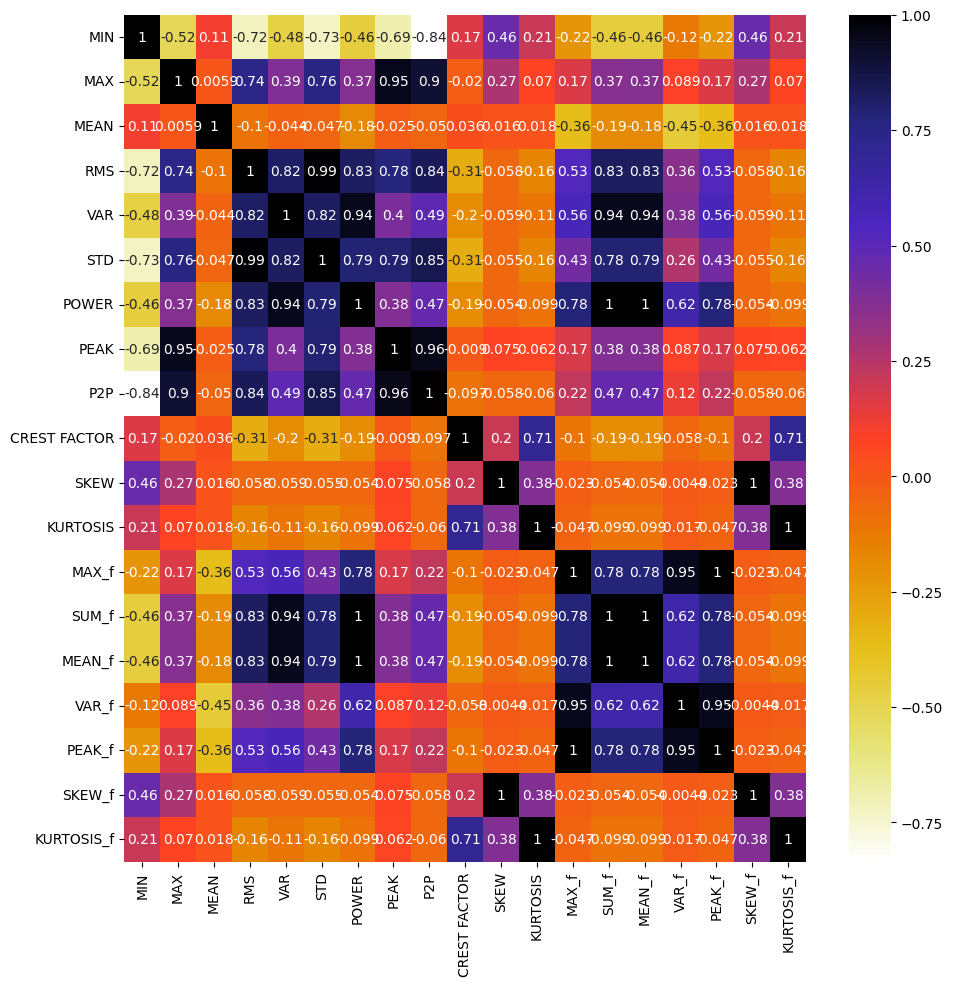

In [234]:
corrmat = X_data.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 11)
sns.heatmap(corrmat, annot=True, cmap=plt.cm.CMRmap_r)


In [235]:
# with the following function we can select highly correlated features

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # we are interested in absolute coeff value
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [236]:
corr_features = correlation(X_data, 0.9)
len(set(corr_features))


10

In [237]:
corr_features


{'KURTOSIS_f',
 'MEAN_f',
 'P2P',
 'PEAK',
 'PEAK_f',
 'POWER',
 'SKEW_f',
 'STD',
 'SUM_f',
 'VAR_f'}

In [238]:
X_data_from_Corrolation = X_data.drop(corr_features,axis=1)
X_data_from_Corrolation

,MIN,MAX,MEAN,RMS,VAR,CREST FACTOR,SKEW,KURTOSIS,MAX_f
0,-0.885,1.750,-0.000796,0.254363,0.064700,6.879930,2.827631,16.328233,2.033477
1,-0.900,1.740,0.000511,0.269620,0.072695,6.453531,2.689177,14.858693,4.027249
2,-1.035,1.790,0.000175,0.273829,0.074982,6.536922,2.467887,13.894459,1.843860
3,-1.170,1.845,-0.000600,0.280689,0.078786,6.573101,1.916639,11.294911,2.014000
4,-1.035,1.700,0.000928,0.266043,0.070778,6.389942,2.119219,11.757525,4.485164
...,...,...,...,...,...,...,...,...,...
17040,-0.845,1.255,0.003319,0.176684,0.031206,7.103086,2.526152,12.966127,2.150350
17041,-0.310,1.020,0.002804,0.139519,0.019458,7.310829,4.481259,24.558055,1.017345
17042,-0.385,1.020,0.002916,0.145594,0.021189,7.005777,3.980178,21.699035,2.611107
17043,-0.410,1.145,0.003498,0.152217,0.023158,7.522144,3.799732,20.161336,1.506311


In [239]:
# combine X_data and Y_data into a single DataFrame
df = pd.concat([X_data, Y_data], axis=1)

# save the combined DataFrame to a CSV file
df.to_csv('cleaned data before select features.csv', index=False)


In [240]:
# combine X_data and Y_data into a single DataFrame
df = pd.concat([X_data_from_Corrolation, Y_data], axis=1)

# save the combined DataFrame to a CSV file
df.to_csv('cleaned data after select features.csv', index=False)
